<a href="https://colab.research.google.com/github/ArinaWhyNot/myfirstrep/blob/main/Lecture03_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задачи к Лекции 3

__Исходные данные__

Дан файл **"mlbootcamp5_train.csv"**. В нем содержатся данные об опросе 70000 пациентов с целью определения наличия заболеваний сердечно-сосудистой системы (ССЗ). Данные в файле промаркированы и если у человека имееются ССЗ, то значение **cardio** будет равно 1, в противном случае - 0. Описание и значения полей представлены во второй лекции.

__Загрузка файла__

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/mlbootcamp5_train.csv",
                 sep=";",
                 index_col="id")
# Делаем one-hot кодирование
chol = pd.get_dummies(df["cholesterol"], prefix="chol")
gluc = pd.get_dummies(df["gluc"], prefix="gluc")
df = pd.concat([df, chol, gluc], axis=1)

# Делаем пол бинарным признаком
df["gender_bin"] = df["gender"].map({1: 0, 2: 1})
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/mlbootcamp5_train.csv'

## Классы в Python

Нередко, возникает необходимость создания объектов с каким-нибудь внутренним поведением и состоянием. Примерами таких объектов являются классификаторы sklearn, массивы numpy и много другое. Такой объект можно объявить с помощью ключевого слова **class**

```python
class SomeObject:
    def __init__(self, depth):
        self.a = depth
        self.target = None
        
    def fit(self, data, target):
        self.target = data
        # magic
        return
    
    def predict(self, data):
        return self.target    
```

После этого в коде можно будет создать экземпляр данного класса
```python
a = SomeObject(depth=5)
a.fit(data, target)
a.predict(data)
```

## Задачи

**1. В sklearn на данный момент отсутствует функционал для построения деревьев решений из категориальных данных, поэтому его нужно сделать самостоятельно и проверить его работу. Что нужно сделать:**

* __создать классификатор используя только pandas, numpy и scipy. Необходимо его сделать самому, используя исключительно только numpy, pandas и scipy (запрещено использовать sklearn и прочие библиотеки). Напоминаю, что для категориальных данных операция < или > не имеют смысла (использовать только != и ==). Гиперпараметром данного классификатора должна быть максимальная глубина дерева.__
* __Проверить работу данного классификатора на наборе ("gender", "cholesterol", "gluc").__
* __С помощью кросс-валидации найти оптимальную глубину этого дерева. Для вашего классификатора GridSearchCV не подойдет, придется это сделать также самостоятельно.__
* __Нарисовать полученное дерево (я должен понять, как и откуда вы его нарисовали).__

Алгоритм работы классификатора:
 1. Перебираем все возможные признаки и смотрим либо неопределенность Джини, либо прирост информации. Это даст критерий разбиения в виде "признак == значение"
 2. Если выборка полученная при разбиении состоит из объектов одного класса (соответсвует нулевой энтропии), то данный лист просто возвращает значение этого класса.
 3. В противном случае, образуется новый узел и для него начинаем с пункта 1.
 4. Если достигли максимальной глубины, то вместа узла создаем лист, который возвращает самое вероятное значение.

__Замечание:__ в этой задаче не нужно использовать onehot-кодирование.

Лучшие параметры: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучшая точность: 0.5918


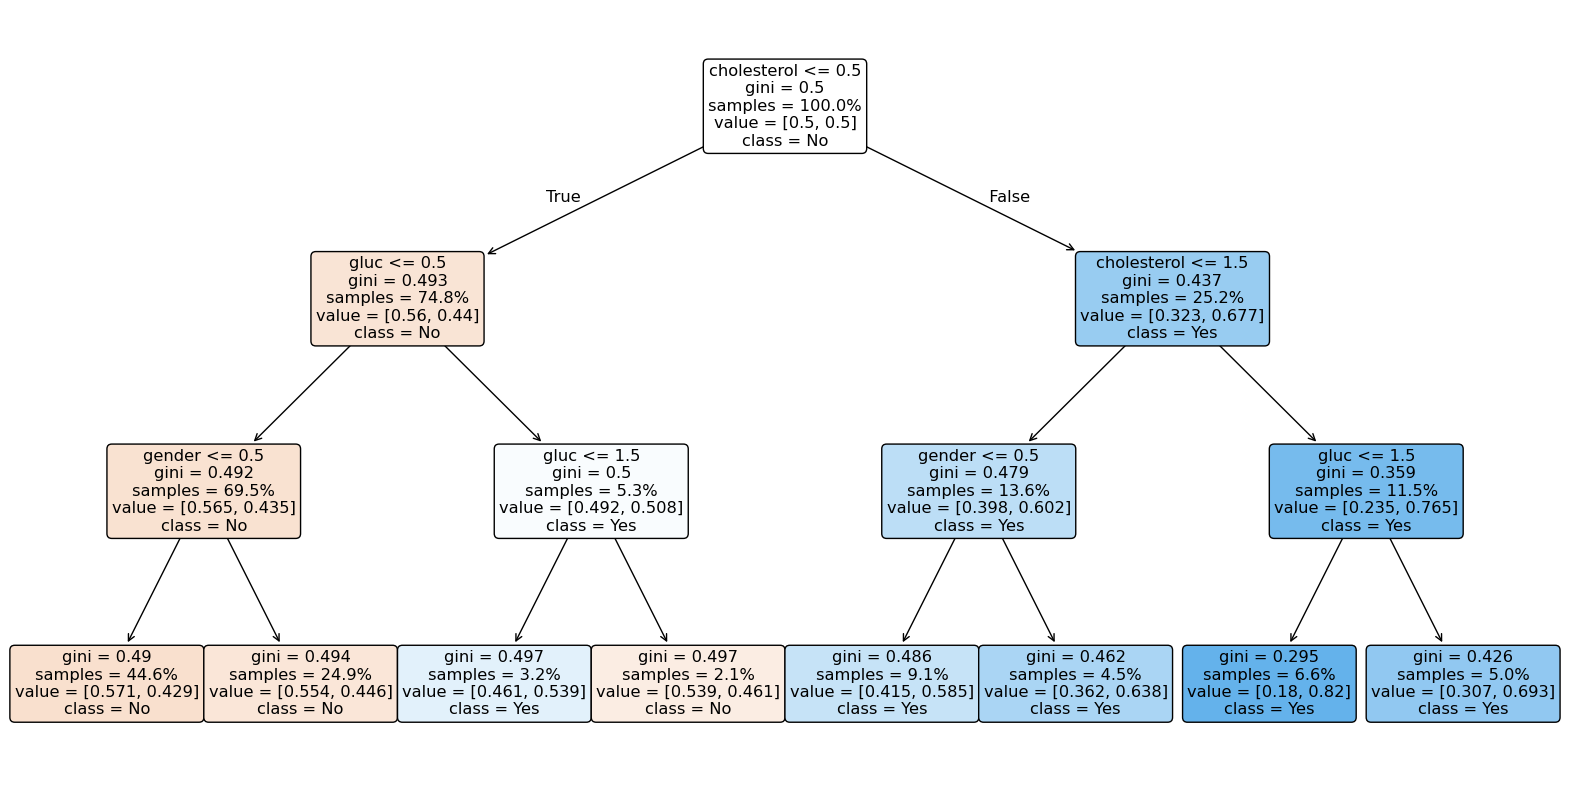


Важность признаков:
cholesterol    0.929229
gluc           0.060990
gender         0.009780
dtype: float64


In [1]:
# A lot of code here
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn import tree
import matplotlib.pyplot as plt

data = pd.read_csv('mlbootcamp5_train.csv', sep=';')
X = data[['gender', 'cholesterol', 'gluc']]
y = data['cardio']

#преобразуем категориальные признаки в числовые
encoder = OrdinalEncoder()
X_encoded = pd.DataFrame(encoder.fit_transform(X), columns=X.columns)

#Создаем модель дерева решений с параметрами для категориальных данных
model = DecisionTreeClassifier(criterion='gini', splitter='best')

#Параметры для поиска
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Поиск оптимальных параметров с кросс-валидацией
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_encoded, y)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая точность: {grid_search.best_score_:.4f}")

#Обучение модели
best_model = grid_search.best_estimator_
best_model.fit(X_encoded, y)

#Визуализация дерева
plt.figure(figsize=(20, 10))
tree.plot_tree(best_model,
               feature_names=X.columns,
               class_names=['No', 'Yes'],
               filled=True,
               rounded=True,
               proportion=True)
plt.show()

#Важность признаков
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
print("\nВажность признаков:")
print(feature_importances.sort_values(ascending=False))

**Комментарии:** Ваши комментарии здесь.
оптимальная модель имеет максимальную глубину 3, минимальное число образцов в листе 1 и минимальное число образцов для разделения узла 2.

низкая точность (59%) может быть из-за недостаточной корреляции между классами, категориальный характер признаков и несбалансированные классы

анализ дерева:
В корневом узле распределение (0.5, 0.5) показывает, что признаки не позволяют сразу хорошо разделить классы.